In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

data = pd.read_csv("NVDA.csv")

data

,Date,Price,Open,High,Low,Vol.,Change %
0,30-11-2018,4.09,3.94,4.10,3.89,729.56M,4.07%
1,29-11-2018,3.93,4.00,4.04,3.90,549.17M,-1.75%
2,28-11-2018,4.00,3.96,4.01,3.83,804.53M,4.17%
3,27-11-2018,3.84,3.80,3.93,3.76,738.06M,0.26%
4,26-11-2018,3.83,3.75,3.84,3.66,814.83M,5.80%
...,...,...,...,...,...,...,...
4994,29-01-1999,0.04,0.04,0.04,0.04,244.03M,0.00%
4995,28-01-1999,0.04,0.04,0.04,0.04,227.52M,0.00%
4996,27-01-1999,0.04,0.04,0.04,0.04,244.37M,0.00%
4997,26-01-1999,0.04,0.05,0.05,0.04,343.20M,-20.00%


In [148]:
data = data[["Date", "Price"]]
data

,Date,Price
0,30-11-2018,4.09
1,29-11-2018,3.93
2,28-11-2018,4.00
3,27-11-2018,3.84
4,26-11-2018,3.83
...,...,...
4994,29-01-1999,0.04
4995,28-01-1999,0.04
4996,27-01-1999,0.04
4997,26-01-1999,0.04


In [149]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

C:\Users\dushy\AppData\Local\Temp\ipykernel_22592\1981509944.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Date"] = pd.to_datetime(data["Date"])
C:\Users\dushy\AppData\Local\Temp\ipykernel_22592\1981509944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])
C:\Users\dushy\AppData\Local\Temp\ipykernel_22592\1981509944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values("Date", 

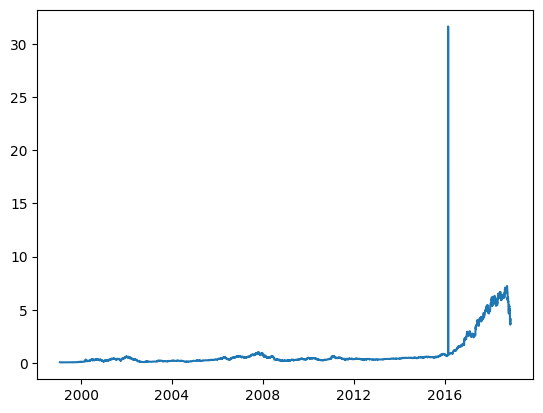

In [150]:
data["Date"] = pd.to_datetime(data["Date"])
data.sort_values("Date", inplace=True)
plt.plot(data["Date"], data["Price"])

In [151]:
from copy import deepcopy as dc


def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index("Date", inplace=True)

    for i in range(1, n_steps + 1):
        df[f"Price(t-{i})"] = df["Price"].shift(i)

    df.dropna(inplace=True)

    return df


lookback = 30
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Price,Price(t-1),Price(t-2),Price(t-3),Price(t-4),Price(t-5),Price(t-6),Price(t-7),Price(t-8),Price(t-9),...,Price(t-21),Price(t-22),Price(t-23),Price(t-24),Price(t-25),Price(t-26),Price(t-27),Price(t-28),Price(t-29),Price(t-30)
Date,,,,,,,,,,,,,,,,,,,,,
1999-03-09,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05
1999-03-10,0.05,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
1999-03-11,0.04,0.05,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
1999-03-12,0.04,0.04,0.05,0.05,0.04,0.04,0.04,0.04,0.05,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
1999-03-15,0.04,0.04,0.04,0.05,0.05,0.04,0.04,0.04,0.04,0.05,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,3.83,3.62,3.62,3.73,3.62,4.11,5.06,4.93,4.98,4.74,...,5.20,4.99,5.53,5.78,5.73,5.99,6.08,6.15,5.88,6.16
2018-11-27,3.84,3.83,3.62,3.62,3.73,3.62,4.11,5.06,4.93,4.98,...,4.96,5.20,4.99,5.53,5.78,5.73,5.99,6.08,6.15,5.88
2018-11-28,4.00,3.84,3.83,3.62,3.62,3.73,3.62,4.11,5.06,4.93,...,4.64,4.96,5.20,4.99,5.53,5.78,5.73,5.99,6.08,6.15


In [152]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[0.05, 0.04, 0.04, ..., 0.04, 0.04, 0.05],
       [0.05, 0.05, 0.04, ..., 0.04, 0.04, 0.04],
       [0.04, 0.05, 0.05, ..., 0.04, 0.04, 0.04],
       ...,
       [4.  , 3.84, 3.83, ..., 5.99, 6.08, 6.15],
       [3.93, 4.  , 3.84, ..., 5.73, 5.99, 6.08],
       [4.09, 3.93, 4.  , ..., 5.78, 5.73, 5.99]])

In [153]:
shifted_df_as_np.shape

(4969, 31)

In [154]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99873538, -0.99936769, -0.99936769, ..., -0.99936769,
        -0.99936769, -0.99873538],
       [-0.99873538, -0.99873538, -0.99936769, ..., -0.99936769,
        -0.99936769, -0.99936769],
       [-0.99936769, -0.99873538, -0.99873538, ..., -0.99936769,
        -0.99936769, -0.99936769],
       ...,
       [-0.74897249, -0.75908947, -0.75972178, ..., -0.62314259,
        -0.61745179, -0.61302561],
       [-0.75339867, -0.74897249, -0.75908947, ..., -0.63958267,
        -0.62314259, -0.61745179],
       [-0.74328169, -0.75339867, -0.74897249, ..., -0.63642112,
        -0.63958267, -0.62314259]])

In [155]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((4969, 30), (4969,))

In [156]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99873538, -0.99936769, -0.99936769, ..., -0.99936769,
        -0.99936769, -0.99936769],
       [-0.99936769, -0.99936769, -0.99936769, ..., -0.99936769,
        -0.99936769, -0.99873538],
       [-0.99936769, -0.99936769, -0.99936769, ..., -0.99936769,
        -0.99873538, -0.99873538],
       ...,
       [-0.61302561, -0.61745179, -0.62314259, ..., -0.77300032,
        -0.75972178, -0.75908947],
       [-0.61745179, -0.62314259, -0.63958267, ..., -0.75972178,
        -0.75908947, -0.74897249],
       [-0.62314259, -0.63958267, -0.63642112, ..., -0.75908947,
        -0.74897249, -0.75339867]])

In [157]:
split_index = int(len(X) * 0.95)

split_index

4720

In [158]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4720, 30), (249, 30), (4720,), (249,))

In [159]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4720, 30, 1), (249, 30, 1), (4720, 1), (249, 1))

In [160]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4720, 30, 1]),
 torch.Size([249, 30, 1]),
 torch.Size([4720, 1]),
 torch.Size([249, 1]))

In [161]:
from torch.utils.data import Dataset


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]


train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [162]:
train_dataset

In [163]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [164]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 30, 1]) torch.Size([16, 1])


In [165]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(
            input_size, hidden_size, num_stacked_layers, batch_first=True
        )

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(
            device
        )
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(
            device
        )

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [166]:
def train_one_epoch():
    model.train(True)
    print(f"Epoch: {epoch + 1}")
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print(
                "Batch {0}, Loss: {1:.3f}".format(
                    batch_index + 1, avg_loss_across_batches
                )
            )
            running_loss = 0.0
    print()

In [167]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print("Val Loss: {0:.3f}".format(avg_loss_across_batches))
    print("***************************************************")
    print()

In [168]:
learning_rate = 0.005
num_epochs = 30
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.146
Batch 200, Loss: 0.002

Val Loss: 0.079
***************************************************

Epoch: 2
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.069
***************************************************

Epoch: 3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.001

Val Loss: 0.002
***************************************************

Epoch: 4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.003

Val Loss: 0.003
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 6
Batch 100, Loss: 0.003
Batch 200, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000

Val Loss: 0.003
***************************************************

Epoch: 8
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000

Val Loss: 0.006
***************************************************



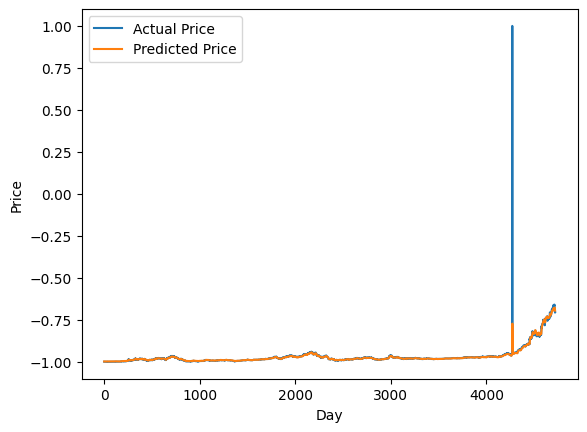

In [169]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to("cpu").numpy()

plt.plot(y_train, label="Actual Price")
plt.plot(predicted, label="Predicted Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


In [170]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback + 1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([0.07399901, 0.07648383, 0.07823904, ..., 4.99285127, 4.94994291,
       4.86008032])

In [171]:
dummies = np.zeros((X_train.shape[0], lookback + 1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

C:\Users\dushy\AppData\Local\Temp\ipykernel_22592\3558067691.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dummies[:, 0] = y_train.flatten()


array([0.05000015, 0.05000015, 0.0399996 , ..., 4.93999986, 4.67000018,
       4.69000033])

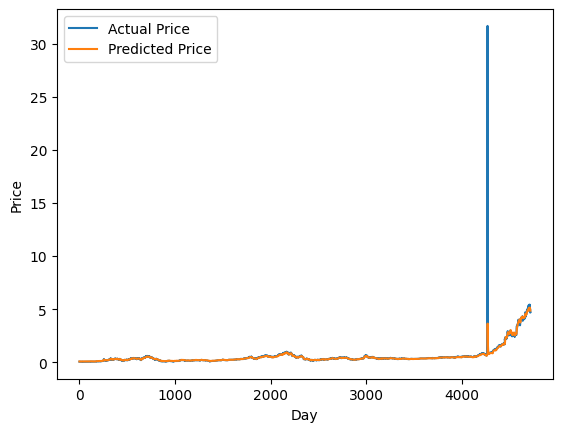

In [172]:
plt.plot(new_y_train, label="Actual Price")
plt.plot(train_predictions, label="Predicted Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()


In [173]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback + 1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([4.79907218, 4.76779514, 4.76309133, 4.75893614, 4.77373005,
       4.76285849, 4.72634504, 4.7019267 , 4.71540468, 4.76263508,
       4.78586946, 4.80465831, 4.81337968, 4.81439774, 4.82798129,
       4.83600982, 4.84107184, 4.82468768, 4.84283365, 4.92822431,
       4.99626743, 5.04917729, 5.1188559 , 5.16718167, 5.20628645,
       5.23448198, 5.24719547, 5.24144343, 5.2598458 , 5.27198333,
       5.30608831, 5.34725184, 5.39871945, 5.41924748, 5.43470125,
       5.47545378, 5.51969034, 5.53167327, 5.54991727, 5.54027776,
       5.50188373, 5.38145203, 5.35195659, 5.35342618, 5.30155606,
       5.33177168, 5.33889244, 5.36357472, 5.42169837, 5.48315615,
       5.5133878 , 5.55409509, 5.54943464, 5.54518141, 5.56026566,
       5.57299611, 5.57940894, 5.56616852, 5.51384593, 5.49447452,
       5.48027825, 5.49903316, 5.5135292 , 5.51903049, 5.5397348 ,
       5.57329116, 5.58759301, 5.60092958, 5.61166634, 5.62361911,
       5.59258338, 5.60518564, 5.61157584, 5.58749874, 5.52936

In [174]:
dummies = np.zeros((X_test.shape[0], lookback + 1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

C:\Users\dushy\AppData\Local\Temp\ipykernel_22592\1391370247.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dummies[:, 0] = y_test.flatten()


array([4.72999969, 4.79999974, 4.79000014, 4.8699998 , 4.76999999,
       4.65000003, 4.65999963, 4.79000014, 4.95000041, 4.89999956,
       4.91999971, 4.89999956, 4.88000035, 4.93999986, 4.93000026,
       4.93000026, 4.84000005, 4.98000016, 5.3100003 , 5.34000005,
       5.38000036, 5.55000023, 5.55000023, 5.58999959, 5.60000013,
       5.57000038, 5.50000032, 5.62000028, 5.60999974, 5.74999985,
       5.84000006, 5.96999963, 5.88999997, 5.91000012, 6.07999999,
       6.1700002 , 6.07000038, 6.14000044, 6.00999993, 5.84000006,
       5.34000005, 5.64000044, 5.7200001 , 5.43999987, 5.79999976,
       5.69999995, 5.81999991, 6.03999969, 6.15999965, 6.10000014,
       6.22999971, 6.03999969, 6.05000023, 6.15000005, 6.15999965,
       6.15000005, 6.05000023, 5.81000031, 5.91000012, 5.88999997,
       6.05000023, 6.05000023, 6.03000008, 6.1299999 , 6.24000025,
       6.19000035, 6.2200001 , 6.22999971, 6.26000041, 6.03000008,
       6.24000025, 6.20999956, 6.05000023, 5.81999991, 6.10999

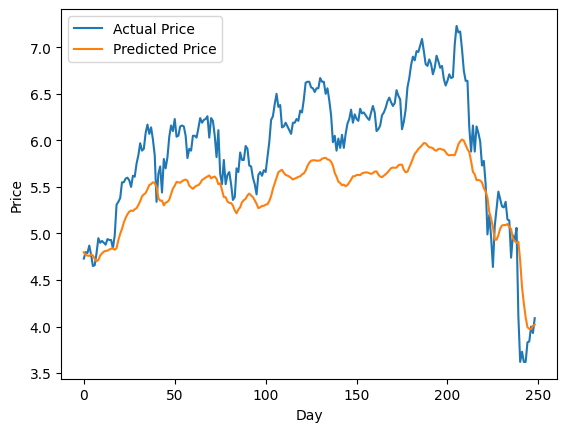

In [175]:
plt.plot(new_y_test, label="Actual Price")
plt.plot(test_predictions, label="Predicted Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()
